# Statistical Analysis of Market Returns
This project investigates the normality of financial returns using statistical tests like the Jarque-Bera test. Focusing on various market indices, including CRSP SmallCap and LargeCap, it identifies deviations from a normal distribution. The findings aim to enhance investment strategies and risk management by providing a deeper understanding of market return behaviors.

## Foundations of Risk and Performance Analysis
In this first section, I dive into the fundamental risk and performance indicators critical to portfolio management. I start by demystifying volatility as the primary measure of risk. Then, I delve into the significance and persistence of risks in non-normal return distributions, highlighting the importance of understanding higher-order moments for strategic asset allocation.

I also introduce more nuanced risk metrics like Value-at-Risk (VaR) and Conditional Value-at-Risk (CVaR), crucial for handling assets with non-standard returns. This part is about laying the essential groundwork for navigating portfolio risks and enhancing performance with a keen eye on the intricacies of asset behavior.

In [161]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import norm
import matplotlib.pyplot as plt
#import seaborn as sns
#from datetime import datetime
# Add any other libraries you anticipate needing

### Risk Adjusted Returns

Let's start working with some real data. I read in the monthly returns of a set of 10 portfolios formed on market caps, or market equities of the companies. Of the 10 portfolios, I would look at the largest cap and the smallest cap companies:

In [4]:
me_m = pd.read_csv("Data/Portfolios_Formed_on_ME.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
me_m.head()

/var/folders/g8/p_3zs4gn64vc1d40qp2p3s700000gp/T/ipykernel_61517/2805160278.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("Data/Portfolios_Formed_on_ME.csv",


,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec.02,Dec.03,Dec.04,Dec.05,Dec.06,Dec.07,Dec.08,Dec.09,Hi 10
192607,NaN,-0.43,1.45,2.68,-0.57,0.37,1.65,1.50,3.33,-1.42,0.29,-0.15,0.88,1.45,1.85,1.63,1.38,3.38,3.29
192608,NaN,3.74,3.03,2.09,3.60,3.64,3.66,1.58,2.33,4.61,2.59,4.03,3.24,2.66,4.67,1.54,1.63,0.98,3.70
192609,NaN,-1.07,-0.59,0.16,-0.48,-1.55,0.03,-0.47,-0.09,0.91,-1.87,-2.27,-0.84,0.12,-0.07,-1.58,0.64,-0.86,0.67
192610,NaN,-3.29,-3.56,-3.06,-3.25,-4.18,-2.90,-3.36,-2.95,-4.72,-1.77,-3.36,-5.01,-3.09,-2.71,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.83,3.09,-0.54,2.25,3.37,3.37,3.16,-0.77,-0.32,-0.29,4.79,3.17,3.58,3.80,2.95,3.61,2.70


In [5]:
cols = ['Lo 10', 'Hi 10']
returns = me_m[cols]
returns.head()

,Lo 10,Hi 10
192607,-1.42,3.29
192608,4.61,3.70
192609,0.91,0.67
192610,-4.72,-2.43
192611,-0.77,2.70


Note that the data is already given in percentages (i.e 4.5 instead of 0.045) and we typically want to use the actual numbers (i.e. 0.045 instead of 4.5) so we should divide the raw data from the file by 100.

In [6]:
returns = returns/100

<Axes: >

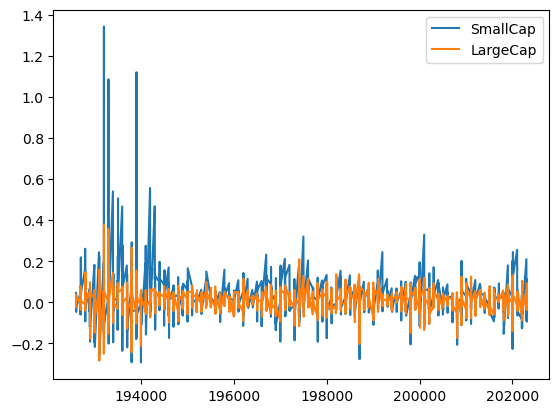

In [7]:
returns.columns = ['SmallCap', 'LargeCap']
returns.plot()

In [8]:
annualized_vol = returns.std()*np.sqrt(12)
annualized_vol

SmallCap    0.364525
LargeCap    0.186647
dtype: float64

In [9]:
n_months = returns.shape[0]
return_per_month = (returns+1).prod()**(1/n_months) - 1
return_per_month

SmallCap    0.012642
LargeCap    0.007589
dtype: float64

In [10]:
annualized_return = (return_per_month + 1)**12-1
annualized_return

SmallCap    0.162705
LargeCap    0.094961
dtype: float64

In [11]:
riskfree_rate = 0.03
excess_return = annualized_return - riskfree_rate
sharpe_ratio = excess_return/annualized_vol
sharpe_ratio

SmallCap    0.364050
LargeCap    0.348044
dtype: float64

### Computing Maximum Drawdown

In this, I'll develop the code to compute the maximum drawdown of a return series.

First, I read the return series:

/var/folders/g8/p_3zs4gn64vc1d40qp2p3s700000gp/T/ipykernel_61517/1285115287.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  me_m = pd.read_csv("Data/Portfolios_Formed_on_ME.csv",


<Axes: >

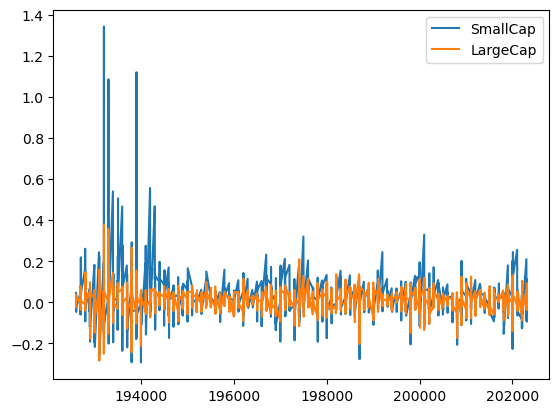

In [12]:
import pandas as pd

me_m = pd.read_csv("Data/Portfolios_Formed_on_ME.csv",
                   header=0, index_col=0, parse_dates=True, na_values=-99.99)
rets = me_m[['Lo 10', 'Hi 10']]
rets.columns = ['SmallCap', 'LargeCap']
rets = rets/100
rets.plot.line()

In [13]:
rets.index = pd.to_datetime(rets.index, format="%Y%m")
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', length=1170, freq=None)

In [20]:
rets.loc["2008"]

,SmallCap,LargeCap
2008-01-01,-0.0436,-0.0493
2008-02-01,-0.0200,-0.0259
2008-03-01,-0.0439,-0.0130
2008-04-01,0.0040,0.0488
2008-05-01,0.0285,0.0156
2008-06-01,-0.0825,-0.1020
2008-07-01,-0.0085,-0.0099
2008-08-01,0.0104,0.0092
2008-09-01,-0.1295,-0.1131
2008-10-01,-0.2074,-0.1741


In [21]:
rets.index = rets.index.to_period('M')
rets.head()

,SmallCap,LargeCap
1926-07,-0.0142,0.0329
1926-08,0.0461,0.0370
1926-09,0.0091,0.0067
1926-10,-0.0472,-0.0243
1926-11,-0.0077,0.0270


In [22]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 1170 entries, 1926-07 to 2023-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  1170 non-null   float64
 1   LargeCap  1170 non-null   float64
dtypes: float64(2)
memory usage: 27.4 KB


In [23]:
rets.describe()

,SmallCap,LargeCap
count,1170.000000,1170.000000
mean,0.017194,0.009034
std,0.105229,0.053880
min,-0.293200,-0.284300
25%,-0.028075,-0.017275
50%,0.010500,0.011600
75%,0.049375,0.038500
max,1.342100,0.377900


## Drawdown function

In [25]:
import pandas as pd

def calculate_drawdown(return_series: pd.Series) -> pd.DataFrame:
    """
    Calculates the drawdown of a financial asset given a time series of returns.

    Parameters:
    - return_series (pd.Series): A time series of asset returns.

    Returns:
    - pd.DataFrame: A DataFrame with columns for the wealth index, the previous peaks,
                    and the percentage drawdown.

    Raises:
    - ValueError: If the input is not a pandas Series.
    """
    if not isinstance(return_series, pd.Series):
        raise ValueError("Input must be a pandas Series.")

    # Calculate wealth index from a $1000 initial investment
    wealth_index = 1000 * (1 + return_series).cumprod()

    # Determine the previous peaks of the wealth index
    previous_peaks = wealth_index.cummax()

    # Calculate drawdowns as the percentage difference from previous peaks
    drawdowns = (wealth_index - previous_peaks) / previous_peaks

    # Compile wealth index, previous peaks, and drawdowns into a DataFrame
    results = pd.DataFrame({
        "Wealth": wealth_index,
        "Previous Peak": previous_peaks,
        "Drawdown": drawdowns
    })

    return results

In [29]:
calculate_drawdown(rets["LargeCap"]).head()

,Wealth,Previous Peak,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [31]:
calculate_drawdown(rets["LargeCap"]).min()

Wealth            405.769102
Previous Peak    1032.900000
Drawdown           -0.840038
dtype: float64

In [33]:
calculate_drawdown(rets["SmallCap"]).min()

Wealth           460.436683
Previous Peak    985.800000
Drawdown          -0.837451
dtype: float64

In [34]:
calculate_drawdown(rets["LargeCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [35]:
calculate_drawdown(rets["SmallCap"])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [36]:
calculate_drawdown(rets["LargeCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [37]:
calculate_drawdown(rets["SmallCap"]["1975":])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [38]:
calculate_drawdown(rets["SmallCap"]["1975":])["Drawdown"].min()

-0.6368665082051987

In [41]:
df_drawdown = calculate_drawdown(rets["SmallCap"]["1975":])

<Axes: >

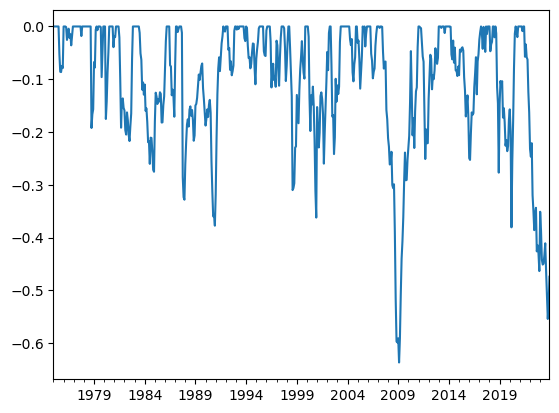

In [42]:
df_drawdown['Drawdown'].plot()

## Deviations from Normality



In [122]:
def get_hfi_returns(filepath="data/edhec-hedgefundindices.csv"):
    """
    Load and format the EDHEC Hedge Fund Index Returns.

    Parameters:
    - filepath: str, the path to the CSV file containing the hedge fund indices data.

    Returns:
    - hfi: DataFrame, the formatted hedge fund indices with dates as a PeriodIndex.
    """
    try:
        # Load the CSV file, automatically parse dates, and set the first column as the index
        hfi = pd.read_csv(filepath, sep=';', index_col='date', parse_dates=True, dayfirst=True)
        # Convert percentage strings to floats and divide by 100
        hfi = hfi.apply(lambda x: x.str.rstrip('%').astype('float') / 100 if x.dtype == 'object' else x)
        # Convert the index to a monthly period
        hfi.index = hfi.index.to_period('M')
    except FileNotFoundError:
        print(f"File not found: {filepath}")
        return None
    except Exception as e:
        print(f"An error occurred: {e}")
        return None

    return hfi

In [123]:
hfi = get_hfi_returns()
hfi.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


## Skewness

A negative skew indicates a higher frequency of negative returns than expected under a normal distribution.

Typically, in a normal distribution, the mean and median are similar. With negative skewness, the mean (expected value) is lower than the median, whereas it's higher in the case of positive skewness.

In [100]:
pd.concat([hfi.mean(), hfi.median(), hfi.mean()>hfi.median()], axis=1)

,0,1,2
Convertible Arbitrage,0.005781,0.00650,False
CTA Global,0.004284,0.00190,True
Distressed Securities,0.006837,0.00880,False
Emerging Markets,0.006740,0.00985,False
Equity Market Neutral,0.004330,0.00465,False
Event Driven,0.006660,0.00875,False
Fixed Income Arbitrage,0.004404,0.00550,False
Global Macro,0.005539,0.00465,True
Long/Short Equity,0.006700,0.00815,False
Merger Arbitrage,0.005569,0.00590,False


The skewness is given by:

$$ S(R) = \frac{E[ (R-E(R))^3 ]}{\sigma_R^3} $$


In [124]:
def skewness(r):
    """
    Computes the skewness of the supplied pandas Series or DataFrame along each column.
    
    This is an alternative to scipy.stats.skew() specifically designed for pandas data structures.
    It uses the population standard deviation (degrees of freedom = 0) for its calculation.
    
    Parameters:
    - r: pandas Series or DataFrame. The data for which skewness is to be computed.
    
    Returns:
    - A float or a pandas Series representing the skewness of the input. For a Series input,
      a single float value is returned. For a DataFrame, a Series is returned with the skewness
      value for each column.
    
    Notes:
    - This function returns NaN for columns where the standard deviation is zero,
      indicating that skewness is undefined in such scenarios.
    """
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    
    # Prevent division by zero by returning NaN if sigma_r is 0
    if (sigma_r == 0).any():
        return float('nan') if isinstance(r, pd.Series) else pd.Series([float('nan')] * len(r.columns), index=r.columns)
    
    exp = (demeaned_r**3).mean()
    return exp / sigma_r**3

In [125]:
skewness(hfi).sort_values()

Fixed Income Arbitrage   -3.784087
Convertible Arbitrage    -2.598859
Relative Value           -2.079472
Equity Market Neutral    -1.918140
Event Driven             -1.881176
Distressed Securities    -1.732838
Merger Arbitrage         -1.620384
Emerging Markets         -1.223409
Funds Of Funds           -0.597301
Long/Short Equity        -0.468476
CTA Global                0.167094
Short Selling             0.758959
Global Macro              0.884331
dtype: float64

Just to see if we get the same answer, let's use the skewness function that is built into `scipy.stats`

In [126]:
scipy.stats.skew(hfi)

array([-2.5988594 ,  0.16709409, -1.73283848, -1.22340855, -1.91814041,
       -1.88117628, -3.78408679,  0.88433107, -0.46847577, -1.62038409,
       -2.07947152,         nan, -0.59730067])

# Kurtosis

Kurtosis measures tail thickness in distributions. A kurtosis less than 3 suggests thinner tails compared to the normal distribution's kurtosis of 3, while a higher kurtosis indicates fatter tails.


Kurtosis is given by:

$$ K(R) = \frac{E[ (R-E(R))^4 ]}{\sigma_R^4} $$

In [127]:
def kurtosis(r):
    """
    Computes the kurtosis of the supplied pandas Series or DataFrame along each column.
    
    This function computes the kurtosis using the population standard deviation (degrees of freedom = 0)
    for its calculation. The result is the excess kurtosis, with 3 subtracted from the
    kurtosis of a normal distribution being considered as 0.
    
    Parameters:
    - r: pandas Series or DataFrame. The data for which kurtosis is to be computed.
    
    Returns:
    - A float or a pandas Series representing the kurtosis of the input. For a Series input,
      a single float value is returned. For a DataFrame, a Series is returned with the kurtosis
      value for each column.
    
    Notes:
    - This function returns NaN for columns where the standard deviation is zero,
      indicating that kurtosis is undefined in such scenarios.
    """
    demeaned_r = r - r.mean()
    sigma_r = r.std(ddof=0)
    
    # Prevent division by zero by returning NaN if sigma_r is 0
    if (sigma_r == 0).any():
        return float('nan') if isinstance(r, pd.Series) else pd.Series([float('nan')] * len(r.columns), index=r.columns)
    
    exp = (demeaned_r**4).mean()
    # Adjust the calculation if you want to return "excess kurtosis" by subtracting 3.
    # return exp / sigma_r**4 - 3
    return exp / sigma_r**4

In [128]:
kurtosis(hfi)

Convertible Arbitrage     21.661630
CTA Global                 2.999865
Distressed Securities     10.833276
Emerging Markets           9.044334
Equity Market Neutral     15.469866
Event Driven              13.308981
Fixed Income Arbitrage    28.476464
Global Macro               5.474004
Long/Short Equity          4.916137
Merger Arbitrage          15.806243
Relative Value            13.196580
Short Selling              6.461034
Funds Of Funds             7.420199
dtype: float64

## Jarque-Bera Test for Normality

Use the `scipy.stats` module to perform the _Jarque-Bera_ test on a dataset, ideal for evaluating normally generated returns.

In [129]:
normal_rets = np.random.normal(0, 0.15, (263, 1))

In [130]:
scipy.stats.jarque_bera(normal_rets)

SignificanceResult(statistic=2.860433927290411, pvalue=0.23925700653976814)

The output provides two numbers: the test statistic and the critical p-value, with the latter being key for our hypothesis test. To accept normal distribution at a 1% significance level, the p-value should exceed 0.01. A p-value below 0.01 indicates rejection of normality. Here, a p-value above 0.01 supports the normality assumption. Next, we'll apply this to various hedge fund indices.

In [131]:
scipy.stats.jarque_bera(hfi, nan_policy='omit')

SignificanceResult(statistic=26699.79080578464, pvalue=0.0)

To treat each column as individual returns, create a wrapper function:

In [138]:
def is_normal(r, level=0.01):
    """
    Applies the Jarque-Bera test to determine if a Series, DataFrame, or NumPy array 
    is normally distributed. The test is applied at the specified significance level, 
    defaulting to 1%.

    Parameters:
    - r: pandas Series, DataFrame, or NumPy array. The data for which the test of normality is to be applied.
    - level: float, optional. The significance level at which the hypothesis is tested. 
             A lower value means a stricter criterion for normality. Default is 0.01.

    Returns:
    - For a Series or NumPy array: True if the hypothesis of normality is accepted, False otherwise.
    - For a DataFrame: A Series indicating True or False for each column.
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(is_normal)
    else:
        statistic, p_value = scipy.stats.jarque_bera(r)
        return p_value > level


In [139]:
is_normal(normal_rets)

True

In [140]:
hfi.aggregate(is_normal)

Convertible Arbitrage     False
CTA Global                 True
Distressed Securities     False
Emerging Markets          False
Equity Market Neutral     False
Event Driven              False
Fixed Income Arbitrage    False
Global Macro              False
Long/Short Equity         False
Merger Arbitrage          False
Relative Value            False
Short Selling             False
Funds Of Funds            False
dtype: bool

## Normality Test for CRSP SmallCap and LargeCap Returns

Examine the normality of the returns studied.

In [141]:
def get_ffme_returns(filepath="data/Portfolios_Formed_on_ME.csv"):
    """
    Load and preprocess the Fama-French Dataset for the returns of the Top and Bottom Deciles by MarketCap.
    
    Parameters:
    - filepath: str, optional. The path to the CSV file containing the Fama-French Dataset. Default is "data/Portfolios_Formed_on_ME.csv".
    
    Returns:
    - rets: pandas DataFrame. Preprocessed returns with columns ['SmallCap', 'LargeCap'] and a period-index formatted as monthly periods.
    
    Raises:
    - FileNotFoundError: If the specified file cannot be found.
    - Exception: For other issues that arise during file loading or preprocessing.
    """
    try:
        # Load the dataset, specifying NA values and the index column
        me_m = pd.read_csv(filepath, header=0, index_col=0, na_values=['-99.99', ''])
        rets = me_m[['Lo 10', 'Hi 10']]
        rets.columns = ['SmallCap', 'LargeCap']
        rets = rets / 100
        rets.index = pd.to_datetime(rets.index, format="%Y%m").to_period('M')
    except FileNotFoundError:
        raise FileNotFoundError(f"File not found: {filepath}")
    except Exception as e:
        raise Exception(f"An error occurred while processing the file: {e}")
    
    return rets

In [142]:
ffme = get_ffme_returns()
skewness(ffme)

SmallCap    4.302995
LargeCap    0.208150
dtype: float64

In [143]:
kurtosis(ffme)

SmallCap    46.037543
LargeCap    10.307192
dtype: float64

In [144]:
is_normal(ffme)

SmallCap    False
LargeCap    False
dtype: bool

# Downside Risk: SemiDeviation, VaR, and CVaR

In this section, we focus on downside risk measures: SemiDeviation, Value at Risk (VaR), and Conditional Value at Risk (CVaR). These metrics are crucial for understanding and managing the risks associated with negative returns in investment portfolios. 

- **SemiDeviation**: Measures the variability of returns below the mean or below zero, highlighting the risk of negative fluctuations.
- **Value at Risk (VaR)**: Estimates the maximum loss expected over a given time frame at a specific confidence level, capturing the potential extent of negative returns.
- **Conditional Value at Risk (CVaR)**: Provides the expected loss exceeding the VaR, reflecting the severity of losses in the worst-case scenarios beyond the VaR threshold.

In [145]:
hfi = get_hfi_returns()

In [146]:
def semideviation(returns):
    """
    Computes the semideviation, also known as negative semideviation, of returns.
    The input 'returns' should be a pandas Series or DataFrame. Otherwise, it throws a TypeError.
    """
    negative_returns = returns[returns < 0]
    return negative_returns.std(ddof=0)


In [150]:
semideviation(hfi).sort_values()

Global Macro              0.006666
Equity Market Neutral     0.009266
CTA Global                0.012199
Merger Arbitrage          0.012358
Funds Of Funds            0.013161
Relative Value            0.013551
Long/Short Equity         0.015275
Distressed Securities     0.017574
Fixed Income Arbitrage    0.017645
Event Driven              0.019643
Convertible Arbitrage     0.020130
Short Selling             0.027030
Emerging Markets          0.028596
dtype: float64

In [151]:
ffme = get_ffme_returns()
semideviation(ffme)

SmallCap    0.051507
LargeCap    0.039915
dtype: float64

# Value at Risk (VaR) and Conditional Value at Risk (CVaR)

In this section, we explore three methodologies to calculate Value at Risk (VaR):

1. Historical VaR
2. Parametric Gaussian VaR
3. Modified (Cornish-Fisher) VaR

To determine the historical VaR at a specific confidence level, for instance, 5%, we identify the value below which 5% of the returns are observed and above which 95% of the returns are noted. Essentially, this involves calculating the 5th percentile of the return distribution.

In [153]:
def var_historic(r, level=5):
    """
    Calculates the historic Value at Risk (VaR) at a given level.
    VaR represents the threshold loss over a specified time period, under normal market conditions, 
    that will not be exceeded with a certain confidence level. Thus, "level" percent of returns are below this value,
    and (100 - level) percent are above.
    
    Parameters:
    - r: Returns data, expected to be a pandas Series or DataFrame.
    - level: The percentile at which to calculate VaR (default is 5).
    
    Returns:
    - The VaR value, with the sign adjusted to indicate loss (negative).
    """
    if isinstance(r, pd.DataFrame):
        return r.aggregate(var_historic, level=level)
    elif isinstance(r, pd.Series):
        return -np.percentile(r, level)
    else:
        raise TypeError("Expected 'r' to be a Series or DataFrame")

In [154]:
var_historic(hfi, level=1)

Convertible Arbitrage     0.034567
CTA Global                0.047713
Distressed Securities     0.053599
Emerging Markets          0.099628
Equity Market Neutral     0.021331
Event Driven              0.062514
Fixed Income Arbitrage    0.041114
Global Macro              0.026391
Long/Short Equity         0.055739
Merger Arbitrage          0.026763
Relative Value            0.035479
Short Selling                  NaN
Funds Of Funds            0.060112
dtype: float64

## Conditional VaR

In [157]:
def cvar_historic(r, level=5):
    """
    Calculates the Conditional Value at Risk (CVaR) for a given set of returns.
    CVaR provides the average loss over a specified time period, given that the loss is beyond the VaR level.
    
    Parameters:
    - r: A pandas Series or DataFrame containing return values.
    - level: The confidence level as a percentage used to calculate VaR (default is 5).
    
    Returns:
    - The CVaR value, representing the mean of returns that are less than or equal to the VaR, expressed as a negative number.
    """
    if isinstance(r, pd.Series):
        var_level = -var_historic(r, level=level)
        losses_beyond_var = r[r <= var_level]
        return -losses_beyond_var.mean()
    elif isinstance(r, pd.DataFrame):
        return r.apply(cvar_historic, level=level)
    else:
        raise TypeError("Input 'r' must be a pandas Series or DataFrame")


In [158]:
cvar_historic(hfi, level=1).sort_values()

Global Macro              0.029767
Equity Market Neutral     0.037200
Merger Arbitrage          0.053667
CTA Global                0.054767
Relative Value            0.061600
Funds Of Funds            0.064633
Long/Short Equity         0.070567
Fixed Income Arbitrage    0.072467
Distressed Securities     0.089067
Event Driven              0.092733
Convertible Arbitrage     0.098800
Emerging Markets          0.147967
Short Selling                  NaN
dtype: float64

## Parametric Gaussian VaR

Parametric Gaussian Value at Risk (VaR) is a statistical technique used to estimate the potential loss in value of a portfolio over a set period, under normal market conditions, at a specific confidence level. This method, also known as the variance-covariance method, assumes that returns are normally distributed. The beauty of the Parametric Gaussian VaR lies in its simplicity and efficiency. By utilizing the mean and standard deviation of the portfolio's returns, it computes the VaR directly through a formula, avoiding the need for extensive historical return data. This approach makes it particularly appealing for portfolios where the underlying assets exhibit stable volatility and returns that closely follow a Gaussian distribution. Through its analytical nature, Parametric Gaussian VaR offers a quick and insightful measure of risk, providing investors with a clear threshold of potential loss that helps in making informed decisions.

In [164]:
def var_gaussian(r, level=5):
    """
    Calculates the Parametric Gaussian Value at Risk (VaR) for a series of returns.
    This method assumes the returns follow a normal distribution and computes VaR as
    the maximum expected loss at a specified confidence level.

    Parameters:
    - r: A pandas Series or DataFrame containing return values.
    - level: The percentile used to determine the VaR (default is 5).

    Returns:
    - The VaR value, reflecting the potential loss at the given confidence level.
    """
    # Calculate the Z-score corresponding to the given confidence level
    z_score = norm.ppf(level / 100.0)
    # Apply the Parametric Gaussian VaR formula
    return -(r.mean() + z_score * r.std(ddof=0))

In [165]:
var_gaussian(hfi)

Convertible Arbitrage     0.021699
CTA Global                0.033084
Distressed Securities     0.022909
Emerging Markets          0.046880
Equity Market Neutral     0.009127
Event Driven              0.024606
Fixed Income Arbitrage    0.014391
Global Macro              0.018491
Long/Short Equity         0.027569
Merger Arbitrage          0.013250
Relative Value            0.013735
Short Selling             0.076739
Funds Of Funds            0.021859
dtype: float64

# Cornish-Fisher Modification

The Cornish-Fisher modification provides a straightforward adjustment to the z-score calculation. 

When returns deviate from a normal distribution, the standard z-score, which indicates how many standard deviations from the mean a particular value lies, may not accurately reflect the Value at Risk (VaR). Recognizing that real-world data exhibit skewness and kurtosis, this modification adjusts the z-score based on these moments to provide a more accurate estimation of VaR. 

Intuitively, for a given level of skewness (S) and kurtosis (K), the modification alters the z-score:
- If skewness is negative, indicating more extreme negative returns than expected under normality, the z-score is adjusted downward.
- Conversely, with positive skewness, suggesting fewer extreme negative returns, the z-score is adjusted upward.

The modified z-score is calculated as follows:

$$ z_{cornishfisher} = z +\frac{1}{6}(z^2-1)S + \frac{1}{24}(z^3-3z)(K-3)-\frac{1}{36}(2z^3-5z)S^2 $$


This adjustment allows for a more nuanced approach to estimating VaR, taking into account the actual distributional characteristics of the returns.


In [166]:
def var_gaussian(r, level=5, modified=False):
    """
    Calculates the Parametric Gaussian Value at Risk (VaR) for a series of returns.
    Optionally applies the Cornish-Fisher modification to adjust for skewness and kurtosis
    in the return distribution, providing a more accurate VaR under non-normal conditions.

    Parameters:
    - r: A pandas Series or DataFrame of return values.
    - level: The confidence level as a percentage for VaR calculation (default 5).
    - modified: Boolean flag to apply the Cornish-Fisher modification (default False).

    Returns:
    - The calculated VaR, negative indicating a loss.
    """
    # Calculate the standard Gaussian Z-score
    z_score = norm.ppf(level / 100.0)
    if modified:
        # Adjust Z-score for observed skewness and kurtosis using Cornish-Fisher
        skewness_val = skewness(r)
        kurtosis_val = kurtosis(r)
        z_score = (z_score +
                   (z_score**2 - 1) * skewness_val / 6 +
                   (z_score**3 - 3 * z_score) * (kurtosis_val - 3) / 24 -
                   (2 * z_score**3 - 5 * z_score) * (skewness_val**2) / 36
                  )
    # Apply the (possibly modified) Z-score to calculate VaR
    return -(r.mean() + z_score * r.std(ddof=0))


<Figure size 1000x600 with 0 Axes>

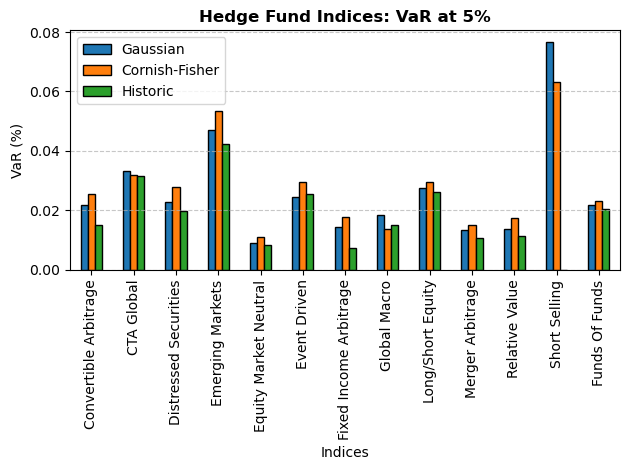

In [176]:
var_table = [
    var_gaussian(hfi), 
    var_gaussian(hfi, modified=True), 
    var_historic(hfi)
]

comparison = pd.concat(var_table, axis=1)
comparison.columns = ['Gaussian', 'Cornish-Fisher', 'Historic']

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
comparison.plot.bar(
    title="Hedge Fund Indices: VaR at 5%",
    color=['#1f77b4', '#ff7f0e', '#2ca02c'],  # Custom colors
    edgecolor='black'  # Add edgecolor for distinction
)

plt.title("Hedge Fund Indices: VaR at 5%", fontweight='bold')
plt.ylabel("VaR (%)")
plt.xlabel("Indices")
plt.grid(axis='y', linestyle='--', alpha=0.7)  # Add horizontal gridlines for readability

plt.tight_layout()  # Adjust the layout to make room for the rotated x-axis labels
plt.show()
